In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

titanic = fetch_openml("titanic", version=1, as_frame=True)
data = titanic.frame
data.head()

f:\anaconda3\envs\usual\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# 特征选择,由于有的数据不好转换为数值，所以就不选为特征了
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = data[features]

# 对于一些值有限的列，对其字符值进行mapping
X['embarked'] = X['embarked'].map({'Q':0,'S':1})
X['sex'] = X['sex'].map({'male': 0, 'female': 1})

X = X.fillna(X.mean())

y = data['survived'].map({'1':1,'0':0})

# **************************************************************************************************************************************************************************************************
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化，将每一个特征的均值调整为0，标准差调整为1，类似于深度学习中的Layernorm
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



C:\Users\brand\AppData\Local\Temp\ipykernel_12340\286492567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embarked'] = X['embarked'].map({'Q':0,'S':1})
C:\Users\brand\AppData\Local\Temp\ipykernel_12340\286492567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'male': 0, 'female': 1})
C:\Users\brand\AppData\Local\Temp\ipykernel_12340\286492567.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to F

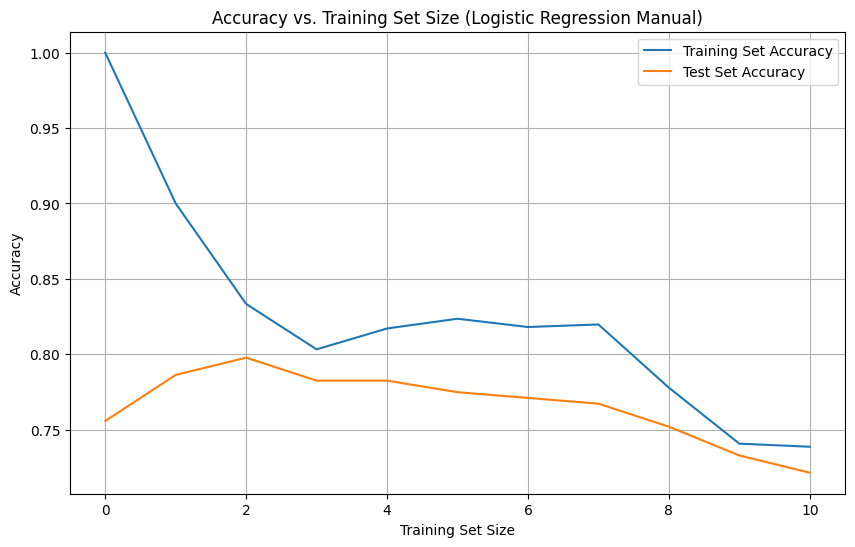

In [7]:
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 训练
def train_logistic_regression(X, y, lr, iterations):
    m, n = X.shape
    weights = np.zeros((n, 1))
    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        error = y - predictions
        gradient = np.dot(X.T, error)
        weights += lr * gradient
    return weights

# 在逻辑回归训练之前，将类别数据转换为数值标签，而不是字符
y_train = y_train.astype(int)
y_test = y_test.astype(int)  # 将标签转换为整数类型

# 添加一列常数1到特征矩阵X中，处理就像是PPT中的trick
X_train_logistic = np.column_stack((np.ones((X_train.shape[0], 1)), X_train))
X_test_logistic = np.column_stack((np.ones((X_test.shape[0], 1)), X_test))


lr = 0.01
iterations = 1000
weights = train_logistic_regression(X_train_logistic, y_train.values.reshape(-1, 1), lr, iterations) # 注意这里的标签值是单独的一个array

# 预测
def predict_logistic_regression(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return np.round(predictions)

logistic_predictions_manual = predict_logistic_regression(X_test_logistic, weights)

# 准确率
logistic_accuracy_manual = accuracy_score(y_test, logistic_predictions_manual)

# print("逻辑回归准确率:", logistic_accuracy_manual)

# batch计算
def train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test, lr, iterations):

    train_accuracies = []
    test_accuracies = []

    for i in range(10, len(X_train), 100):

        X_train_subset = X_train[:i]
        y_train_subset = y_train[:i]

        weights = train_logistic_regression(X_train_subset, y_train_subset.to_numpy().reshape(-1, 1), lr, iterations)
        logistic_predictions_train = predict_logistic_regression(X_train_subset, weights)

        train_accuracy = accuracy_score(y_train_subset, logistic_predictions_train)
        train_accuracies.append(train_accuracy)

        logistic_predictions_test = predict_logistic_regression(X_test, weights)

        test_accuracy = accuracy_score(y_test, logistic_predictions_test)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies


train_accuracies, test_accuracies = train_and_evaluate_logistic_regression(X_train_logistic, y_train, X_test_logistic, y_test, lr, iterations)


plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Set Accuracy')
plt.plot(test_accuracies, label='Test Set Accuracy')
plt.title('Accuracy vs. Training Set Size (Logistic Regression Manual)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.show()

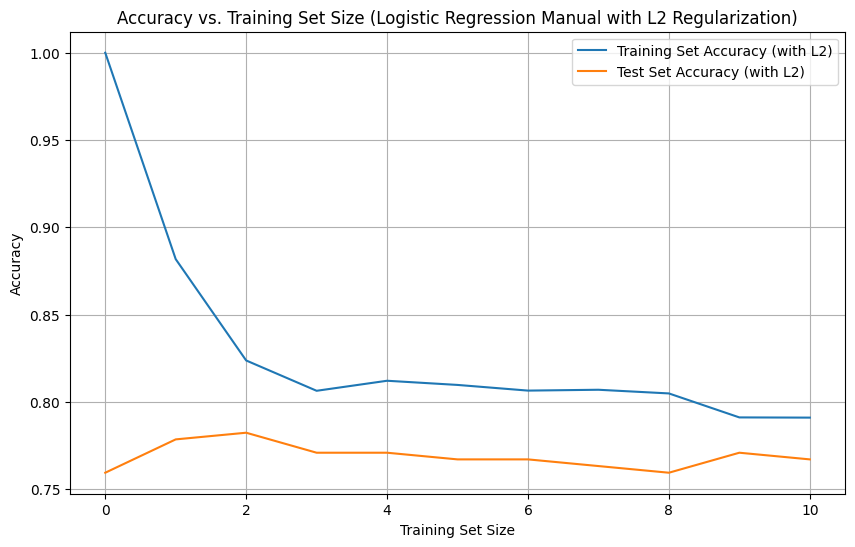

In [8]:
# 定义带L2正则化的逻辑回归训练函数
def train_logistic_regression_with_l2(X, y, learning_rate, num_iterations, l2_lambda):
    m, n = X.shape
    weights = np.zeros((n, 1))
    for i in range(num_iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        error = y - predictions
        gradient = (np.dot(X.T, error) + l2_lambda * weights) / m
        weights += learning_rate * gradient
    return weights

# 在逻辑回归训练之前，将类别数据转换为数值标签
y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train_logistic = np.column_stack((np.ones((X_train.shape[0], 1)), X_train))


learning_rate = 0.01
num_iterations = 1000

l2_lambda = 0.1  # 正则化参数

weights_with_l2 = train_logistic_regression_with_l2(X_train_logistic, y_train.values.reshape(-1, 1), learning_rate, num_iterations, l2_lambda)



# 定义带L2正则化的逻辑回归预测函数
def predict_logistic_regression_with_l2(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return np.round(predictions)


logistic_predictions_manual_with_l2 = predict_logistic_regression_with_l2(X_test_logistic, weights_with_l2)

# 准确率
logistic_accuracy_manual_with_l2 = accuracy_score(y_test, logistic_predictions_manual_with_l2)

# print("逻辑回归（带L2正则化）准确率:", logistic_accuracy_manual_with_l2)



def train_and_evaluate_logistic_regression_with_l2(X_train, y_train, X_test, y_test, learning_rate, num_iterations, l2_lambda):
    train_accuracies = []
    test_accuracies = []

    for i in range(10, len(X_train), 100):
        X_train_subset = X_train[:i]
        y_train_subset = y_train[:i]
        weights = train_logistic_regression_with_l2(X_train_subset, y_train_subset.to_numpy().reshape(-1, 1), learning_rate, num_iterations, l2_lambda)
        logistic_predictions_train = predict_logistic_regression_with_l2(X_train_subset, weights)
        train_accuracy = accuracy_score(y_train_subset, logistic_predictions_train)
        train_accuracies.append(train_accuracy)

        logistic_predictions_test = predict_logistic_regression_with_l2(X_test, weights)
        test_accuracy = accuracy_score(y_test, logistic_predictions_test)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies


train_accuracies_l2, test_accuracies_l2 = train_and_evaluate_logistic_regression_with_l2(X_train_logistic, y_train, X_test_logistic, y_test, learning_rate, num_iterations, l2_lambda)

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_l2, label='Training Set Accuracy (with L2)')
plt.plot(test_accuracies_l2, label='Test Set Accuracy (with L2)')
plt.title('Accuracy vs. Training Set Size (Logistic Regression Manual with L2 Regularization)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()













In [9]:
class Perceptron:
    def __init__(self, num_features, lr=1, iterations=1000):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.lr = lr
        self.iterations = iterations

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

    def train(self, X, y):
        for _ in range(self.iterations):
            for i in range(len(X)):
                if i==23 or 29 or 31:
                    continue
                prediction = self.predict(X[i])
                print("第{0}次".format)
                print(prediction)
                print(y[i])
                if prediction != y[i]:
                    update = y[i] - prediction
                    self.weights += update * self.l_r * X[i]
                    self.bias += update * self.l_r

# 初始化 PLA 模型
perceptron_model = Perceptron(num_features=X.shape[1], lr=0.01, iterations=1000)

# 训练 PLA 模型
perceptron_model.train(X_train, y_train)

# 预测测试数据
perceptron_predictions = perceptron_model.predict(X_test)

# 计算 PLA 模型的准确率
accuracy = accuracy_score(y_test, perceptron_predictions)
print("PLA 模型准确率:", accuracy)

PLA 模型准确率: 0.45038167938931295


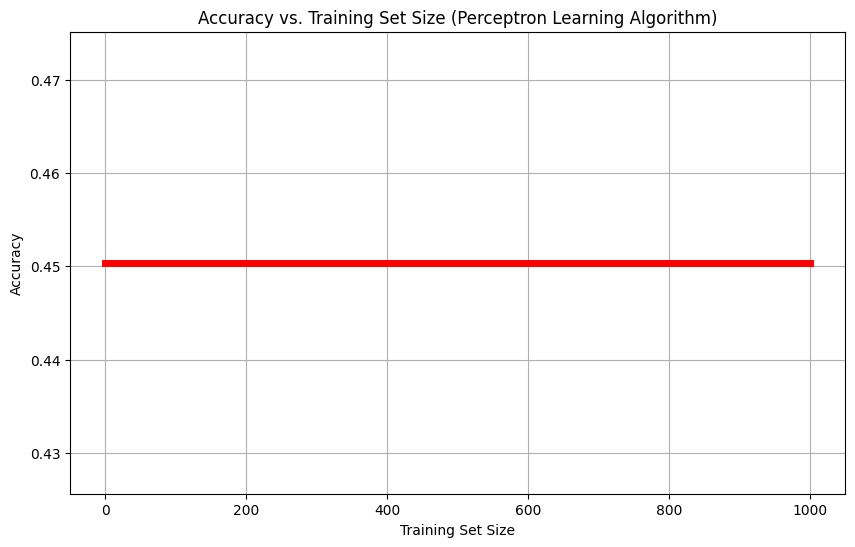

In [10]:

def train_and_evaluate_pla(X_train, y_train, X_test, y_test, lr, iterations):
    train_accuracies = []
    test_accuracies = []

    for i in range(0, len(X_train), 100): # batchsize = 100
        X_train_subset = X_train[:i]
        y_train_subset = y_train[:i]
        
        
        perceptron_model = Perceptron(num_features=X_train.shape[1], lr=lr, iterations=iterations)
        
        # 训练
        perceptron_model.train(X_train_subset, y_train_subset)

        # 预测
        perceptron_predictions = perceptron_model.predict(X_test)
        
        # 准确率
        test_accuracy = accuracy_score(y_test, perceptron_predictions)
        train_accuracies.append(i)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies

train_accuracies_pla, test_accuracies_pla = train_and_evaluate_pla(X_train, y_train, X_test, y_test, lr=0.01, iterations=1000)

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_pla, test_accuracies_pla,linewidth=5.0,color = 'r')
plt.title('Accuracy vs. Training Set Size (Perceptron Learning Algorithm)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

测试集准确率: 0.767175555229187


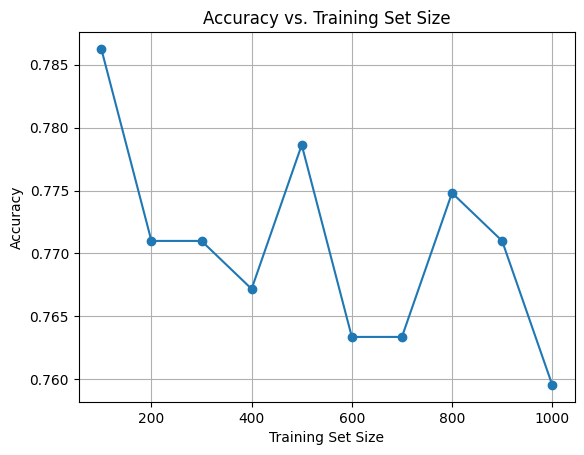

In [12]:
# 将数据转换为PyTorch张量
X_train = torch.FloatTensor(X_train)
y_train = y_train.to_numpy()
y_train = torch.FloatTensor(y_train).view(-1, 1)  # 将标签转换为列向量
X_test = torch.FloatTensor(X_test)
y_test = y_test.to_numpy()
y_test = torch.FloatTensor(y_test).view(-1, 1)


train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


input_size = X_train.size(1)
hidden_size = 32
output_size = 1
model = MLP(input_size, hidden_size, output_size)


criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()


with torch.no_grad():
    test_outputs = model(X_test)
    test_predictions = (test_outputs >= 0.5).float()
    accuracy = (test_predictions == y_test).float().mean()
    print("测试集准确率:", accuracy.item())

train_dataset_sizes = [100, 200, 300, 400, 500,600,700,800,900,1000]  # 根据需要定义不同的训练集大小

# 存储准确率
accuracies = []

for train_size in train_dataset_sizes:
   
    X_train_small = X_train[:train_size]
    y_train_small = y_train[:train_size]

    
    X_train_small = torch.FloatTensor(X_train_small)
    y_train_small = torch.FloatTensor(y_train_small).view(-1, 1)

    
    train_dataset = TensorDataset(X_train_small, y_train_small)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    
    num_epochs = 100
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    
    with torch.no_grad():
        test_outputs = model(X_test)
        test_predictions = (test_outputs >= 0.5).float()
        accuracy = accuracy_score(y_test, test_predictions.numpy())
        accuracies.append(accuracy)


plt.plot(train_dataset_sizes, accuracies, marker='o')
plt.title('Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

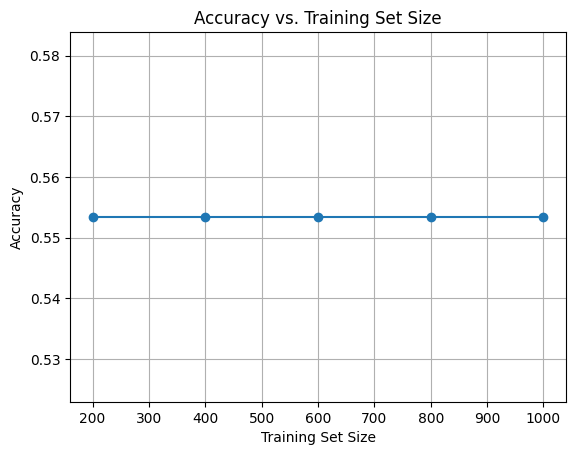

In [19]:
class Triple_MLP(nn. Module):
    def __init__(self, input_size, hidden_size1,hidden_size2, output_size):
        super(Triple_MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.sigmoid = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size2,output_size)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    


model = Triple_MLP(input_size, 128,32, output_size)


train_dataset_sizes = [200,  400, 600,800,1000]  # 根据需要定义不同的训练集大小

# 存储准确率
accuracies = []

for train_size in train_dataset_sizes:
   
    X_train_small = X_train[:train_size]
    y_train_small = y_train[:train_size]
    
    X_train_small = torch.FloatTensor(X_train_small)
    y_train_small = torch.FloatTensor(y_train_small).view(-1, 1)
    
    train_dataset = TensorDataset(X_train_small, y_train_small)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    num_epochs = 500

    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    
    with torch.no_grad():
        test_outputs = model(X_test)
        test_predictions = (test_outputs >= 0.5).float()
        accuracy = accuracy_score(y_test, test_predictions.numpy())
        accuracies.append(accuracy)


plt.plot(train_dataset_sizes, accuracies, marker='o')
plt.title('Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()




# 三层的时候效果就不是很好了，亲自实验的